In [2562]:
## for my knn project I have chose to classify different types of drugs, I got my dataset from here:
# https://www.kaggle.com/datasets/prathamtripathi/drug-classification.

## knn is a supervised algorithm that classifies a data point that is close to other data points, this is done with picking the 
## value of k. picking the value of k is done by trial and error.

In [2563]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2564]:
dataset = pd.read_csv("drug200.csv")

In [2565]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
features = ['BP', 'Cholesterol', 'Na_to_K']
X = dataset[features]
y = dataset['Drug']

In [2567]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2568]:
## here I iterate through the BP column to find all types of BP levels
s = set()
for x in dataset['BP']:
    s.add(x)
print(s)

{'HIGH', 'NORMAL', 'LOW'}


In [2569]:
dataset['BP'] = dataset['BP'].map({'LOW':0, 'NORMAL':1, 'HIGH':2})
print(dataset['BP'])

0      2
1      0
2      0
3      1
4      0
      ..
195    0
196    0
197    1
198    1
199    0
Name: BP, Length: 200, dtype: int64


In [2570]:
## here I iterate through the Cholesterol column to find all types of Cholesterol levels
s = set()
for x in dataset['Cholesterol']:
    s.add(x)
print(s)

{'HIGH', 'NORMAL'}


In [2571]:
dataset['Cholesterol'] = dataset['Cholesterol'].map({'NORMAL':0, 'HIGH':1})
print(dataset['Cholesterol'])

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    0
Name: Cholesterol, Length: 200, dtype: int64


In [ ]:
# features = [['BP', 'Cholesterol' ,'Na_to_K']]
# features

# X = dataset[features]
# y = dataset['Drug']

# X = features

X = dataset[['BP', 'Cholesterol', 'Na_to_K']]
y = dataset['Drug']

In [2573]:
# dataset
X

,BP,Na_to_K
0,2,25.355
1,0,13.093
2,0,10.114
3,1,7.798
4,0,18.043
...,...,...
195,0,11.567
196,0,12.006
197,1,9.894
198,1,14.020


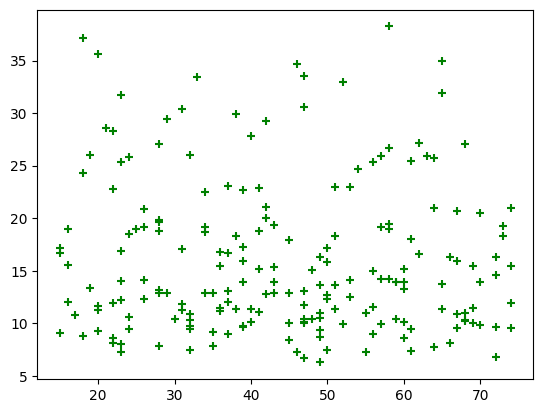

In [2574]:
plt.scatter(dataset['Age'], dataset['Na_to_K'], color='green', marker='+')

In [2575]:
from sklearn.model_selection import train_test_split

In [2576]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [2577]:
len(X_train)

160

In [2578]:
len(X_test)

40

In [2579]:
from sklearn.neighbors import KNeighborsClassifier

In [2580]:
knn = KNeighborsClassifier(n_neighbors=3)

In [2581]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [2582]:
print("models score is:", knn.score(X_train, y_train) * 100)

pred = knn.predict(X_test)

models score is: 90.625


In [2583]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred)

In [2584]:
matrix

array([[22,  0,  0,  0,  0],
       [ 0,  3,  1,  0,  1],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  2],
       [ 1,  0,  0,  1,  6]])

{'drugA', 'DrugY', 'drugX', 'drugB', 'drugC'}


Text(58.222222222222214, 0.5, 'Truth')

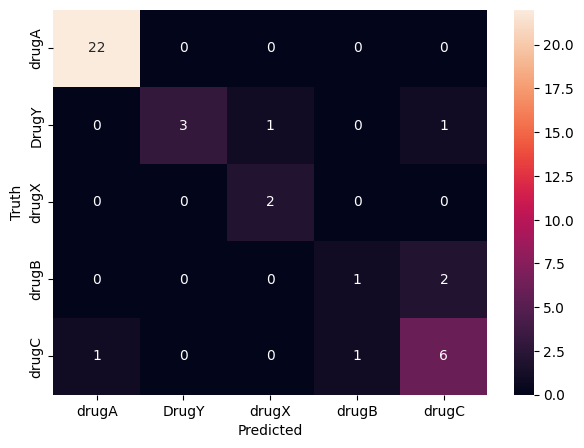

In [2585]:
# import seaborn as sns; sns.set()
# sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')

# class_names = ['BP', 'Col', 'Na-K', 'drug', 'Class 4']

drugs = set()
for c in dataset['Drug']:
    drugs.add(c)
print(drugs)

classes = drugs

import seaborn as sns
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True, xticklabels=drugs, yticklabels=drugs)
plt.xlabel('Predicted')
plt.ylabel('Truth')

C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: can only concatenate str (not "int") to str

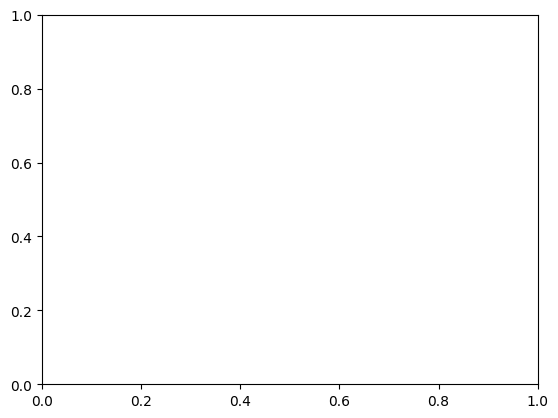

In [ ]:
from mlxtend.plotting import plot_decision_regions 
import numpy as np

X = np.array(X)
y = np.array(y)

# y = y.astype(np.int_)

dataset['Drug'] = dataset['Drug'].map({'drugC':0, 'drugB':1, 'drugX':2, 'drugY':3, 'drugA':4})

newY = np.array(dataset['Drug'], dtype=int)

plot_decision_regions(X, newY, clf=knn, legend=2)

# plt.xlabel('X')  
# plt.ylabel('Y')
# plt.title('KNN with K=5')

# newY